In [ ]:
%matplotlib inline

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#years  = np.arange(1., 20., 0.5)
#cpw = lambda price, year, usage : price/(year * usage)
#vfunc = np.vectorize(cpw)
#cset = np.array([(1000, i, 20) for i in range(1,21)])
# print(cset)
# print(vfunc(cset))
sns.set_style('darkgrid')

# make this fn do both later


def scaled_cpw(price, years, usage, scale=None):
    price = price * (scale/years)
    years = scale
    return price


def scale_real_time(ogprice, years, scale):
    print(ogprice, years, scale, sep='===')
    if years == scale:
        return ogprice
    remaining_years = scale % years
    sections = scale // years
    running_price = ogprice
    price_array = np.zeros(years) + running_price
    running_price += ogprice
    for i in range(sections - 1):
        price_array = np.concatenate(
            (price_array, np.zeros(years) + running_price))
        running_price += ogprice
    if remaining_years > 0:
        running_price += ogprice
        price_array = np.concatenate(
            (price_array, np.zeros(remaining_years) + running_price))
    return price_array


def plot_cpw(price, years, usage, scale=None, label=None):
    price = price if scale is None else scale_real_time(
        price, years, scale)
    years = scale if scale is not None else years
    # if scale is not None:
    #    price = price * (scale/years)
    #    years = scale
    years_array = np.arange(1, years + 1, 1)
    #print(years_array)
    usage = usage
    #print('dimension of price array ', price.shape)
    #print('\n dimension of years_array ', years_array.shape)
    cpw = price / (years_array * usage)
    #print(cpw.shape)
    #print(years_array.shape)
    plt.xlabel('years', fontsize=18)
    plt.ylabel('cost per use', fontsize=16)
    plt.plot(years_array, cpw, label=label)
    plt.legend()


def compare(item1, item2):
    plt.figure()
    price1, years1, usage1, label1 = item1
    price2, years2, usage2, label2 = item2
    scale = max(years1, years2)
    scale1 = scale if years1 < scale else None
    scale2 = scale if years2 < scale else None
    plot_cpw(price1, years1, usage1, scale=scale1, label=label1)
    plot_cpw(price2, years2, usage2, scale=scale2, label=label2)

#plot_cpw(5000, 30, 365, label = 'bifl')
#plot_cpw(300, 2, 365, scale=30, label = 'normal')


#plot_cpw(5000, 15, 365, label = 'bifl backpack')
#plot_cpw(2000, 2, 365, scale=15, label = 'normal backpack')
#
#plot_cpw(1600, 15, 365, label = 'nalgene')
#plot_cpw(300, 2, 365, scale=15, label = 'normal')


2000===2===15
300===2===20


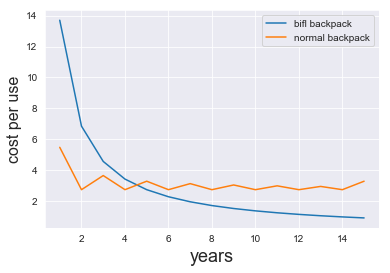

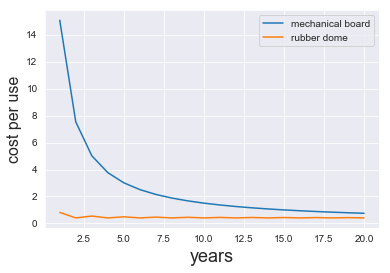

In [27]:
compare((5000, 15, 365, 'bifl backpack'), (2000, 2, 365, 'normal backpack'))
compare((5499, 20, 365, 'mechanical board'), (300, 2, 365, 'rubber dome'))

#scale_real_time(3000, 3, 15)
#scale_real_time(3000, 3, 17)
#scale_real_time(43000, 3, 17)
#print(scaled_cpw(200, 0.5, 20, scale = 15))

plt.show()

In [35]:
def compare_all(items, scale=None):
    for price, years, usage, label in items:
        plot_cpw(price, years, usage, label = label, scale = scale)

In [36]:
items = [(2200, 10, 25, 'Lacoste'),
         (500, 2, 20, 'normal'),
         (1899, 10, 20, 'the SC'),
         (6000, 4, 20, 'FB')
        ]

2200===10===20
500===2===20
1899===10===20
6000===4===20


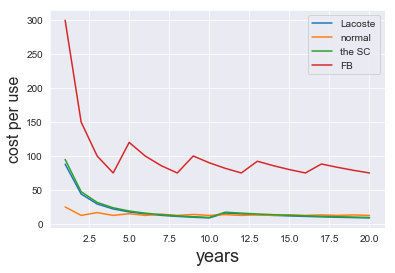

In [38]:
compare_all(items, scale=20)

In [39]:
items2 = [(5000, 15, 365, 'bifl backpack'), (2000, 2, 365, 'normal backpack')]

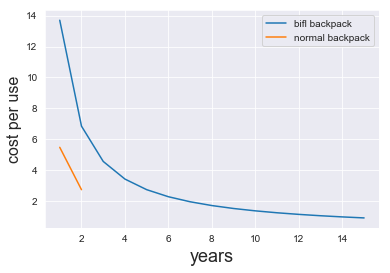

In [40]:
compare_all(items2)

5000===15===15
2000===2===15


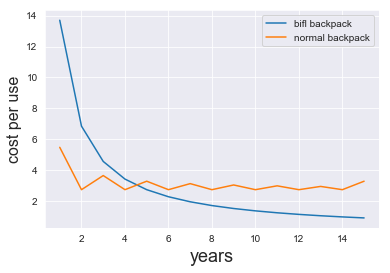

In [41]:
compare_all(items2, scale = 15)